In [ ]:
#you are hired by a company as a data scientist to predict if a start-up will be profitable
#they gave you a dataset that has information about 50 start-ups

Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import the dataset


In [ ]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Spliting the dataset into Features and Labels

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

Encoding Categorical Data

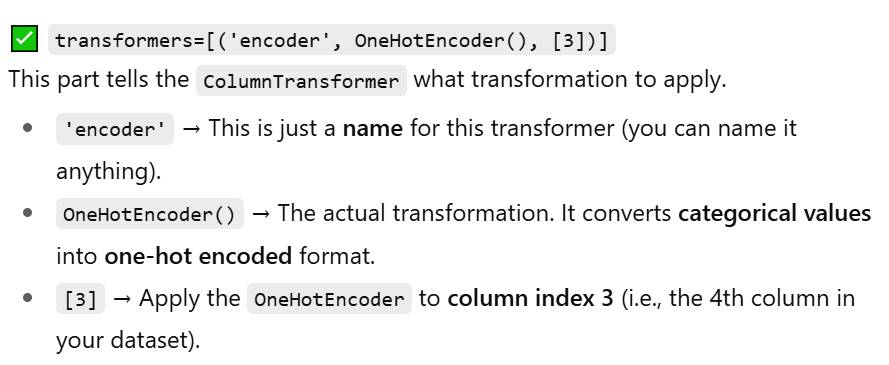

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])],remainder='passthrough')

#and here we use the ct(short for ColumnTransformer) function we used on x
x = ct.fit_transform(x)
x = np.array(x)
#then we replace the old x(with Spain, Germany and France in it) with the new one which has now vectors for each
#country:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

Spliting the dataset into the training and test set


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Feature Scaling

In [ ]:
#in multiple linear regression we dont need to do feature scaling

In [ ]:
#do we have to check the prerequisited of multiple linear regression(the photo we
#took from the PDF) before we start training our model?
#NO! because your model will simply perform poorly if your choosing the wrong algorythm
#so dont waste time checking

Training the MLR model on the training set

In [ ]:
#the class that we are about to call to build our MLR model will automatically
#avoid the dummy variable trap and will automatically do the backward elimination technique.


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

Predicting test set results

In [ ]:
model.predict(X_test)

array([103015.20159795, 132582.27760816, 132447.73845175,  71976.09851258,
       178537.48221057, 116161.24230167,  67851.69209676,  98791.73374687,
       113969.43533014, 167921.06569552])

In [ ]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
#now lets visualize them so that we can compare them easier.
#since we have 4 features here we can use matplotlib and plot the results
#but we will use numpy to print predictions and Y hats side by side so that
#we can compare them easily:

prediction = model.predict(X_test)
#we want to see the results with just 2 decimals:
np.set_printoptions(precision=2)
#now lets print what we want:
print(np.concatenate((prediction.reshape(len(prediction),1),Y_test.reshape(len(Y_test),1)),axis=1))
#np.concatenate can print side by side and it needs 2 numpy arrays with (x,1) shapes
#we dont have the needed shape needed for np.concatenate so we need to reshape the prediction and Y_test arrays
#axis=1 tells concatenate to print vertically(axis=0 means horizontally)

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


Calculating some accuracy metrics

In [ ]:
# Calculate Mean Absolute Error (MAE)
#provides a straightforward measurement of how far off predictions are on average, without magnifying large errors.
mae = np.mean(np.abs(prediction - Y_test))
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
#penalizes larger errors more than smaller ones, which can make it more sensitive to outliers
mse = np.mean((prediction - Y_test) ** 2)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
#RMSE is more interpretable in the context of the original data scale, giving a clearer idea of prediction error magnitude.
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared value
#shows how well the model explains the variance in the dependent variable
ss_total = np.sum((Y_test - np.mean(Y_test)) ** 2)
ss_residual = np.sum((Y_test - prediction) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print("R-squared:", r_squared)

Mean Absolute Error (MAE): 7514.29365964318
Mean Squared Error (MSE): 83502864.03256194
Root Mean Squared Error (RMSE): 9137.9901527941
R-squared: 0.9347068473282546


In [ ]:
#chatgpt promt:


#these are my results. is my model acting poorly or good? why?
# Mean Absolute Error (MAE): 7514.29365964318
# Mean Squared Error (MSE): 83502864.03256194
# Root Mean Squared Error (RMSE): 9137.9901527941
# R-squared: 0.9347068473282546

Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [ ]:
print(model.predict([[1,0,0,160000,130000,300000]]))

[181566.92]
